In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
#from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
#from xgboost import plot_importance
#from matplotlib import pyplot
scaler = StandardScaler()

In [2]:
data = pd.read_csv('training.csv')
test = pd.read_csv('test.csv')

In [ ]:
ss = data.isin([-999.0])
s = ss.apply(pd.Series.value_counts, axis=1)
data2 = data[(s[True] < 23)  | (s[True].isna())]

In [6]:
data2.shape

(1186609, 50)

In [49]:
training_data, validation_data = train_test_split(data, random_state=11, train_size=0.1, test_size=0.1)
len(training_data), len(validation_data)

(120000, 120000)

In [4]:
features = list(set(data.columns) - {'Label'})

In [ ]:
X_train = scaler.fit_transform(training_data[features])
X_val = scaler.fit_transform(validation_data[features])
X_train.shape

In [54]:
%%time
clf = XGBClassifier(max_depth= 3, n_estimators = 70, learning_rate = 1.15,
                    min_child_weight= 1, subsample=1, nthread=-1, silent=False)
clf.fit(X_train, training_data.Label, verbose=True)

CPU times: user 1min 25s, sys: 301 ms, total: 1min 25s
Wall time: 1min 26s


In [55]:
proba = clf.predict_proba(X_val)
print(log_loss(validation_data.Label, proba))

0.680351456101


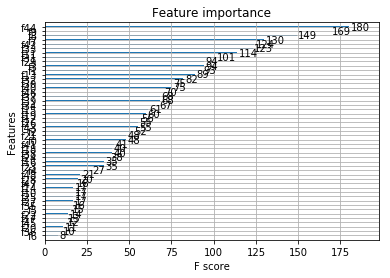

In [24]:
plot_importance(clf)
pyplot.show()

In [31]:
print(np.argsort(clf.feature_importances_)[::-1])

[44  9  8  7 42 33 11 31  3 29  1 13 32 40 30 46 39 37 34 15 19 12 26 43  2
 21  0 41 18 38 24 16 23  4 48 28 47 25 27 10 14 35  5 22 17 45 20 36  6]


In [28]:
print(clf.feature_importances_)

[ 0.0166551   0.03226926  0.01804303  0.03261624  0.00936849  0.00520472
  0.00277585  0.04510757  0.05170021  0.05863983  0.00589868  0.03955586
  0.01943095  0.03088133  0.00589868  0.02116586  0.01214434  0.00451076
  0.01387925  0.02081888  0.00381679  0.0166551   0.00485774  0.01214434
  0.01318529  0.00589868  0.01908397  0.00589868  0.00693963  0.03261624
  0.02602359  0.03504511  0.02845246  0.0426787   0.02324774  0.0055517
  0.00346981  0.02359473  0.01387925  0.02359473  0.02602359  0.01422623
  0.04302568  0.01908397  0.06245663  0.00416378  0.02428869  0.00624566
  0.00728661]


In [37]:
data.iloc[:,6].name

'EcalDLLbeElectron'

In [9]:
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [14]:
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(features)):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))



Feature ranking:
1. feature 8 (0.101581)
2. feature 7 (0.091128)
3. feature 31 (0.057402)
4. feature 33 (0.055728)
5. feature 27 (0.054409)
6. feature 42 (0.048260)
7. feature 29 (0.039828)
8. feature 1 (0.038477)
9. feature 3 (0.037697)
10. feature 23 (0.036589)
11. feature 13 (0.036582)
12. feature 44 (0.032966)
13. feature 43 (0.031682)
14. feature 32 (0.030443)
15. feature 16 (0.030213)
16. feature 28 (0.026587)
17. feature 40 (0.025817)
18. feature 30 (0.020975)
19. feature 9 (0.020906)
20. feature 18 (0.016858)
21. feature 19 (0.014939)
22. feature 11 (0.013676)
23. feature 34 (0.012709)
24. feature 24 (0.011491)
25. feature 37 (0.010565)
26. feature 46 (0.010467)
27. feature 39 (0.009796)
28. feature 41 (0.009243)
29. feature 15 (0.008854)
30. feature 26 (0.008073)
31. feature 38 (0.007533)
32. feature 21 (0.007326)
33. feature 12 (0.007018)
34. feature 2 (0.006350)
35. feature 0 (0.006108)
36. feature 22 (0.004500)
37. feature 48 (0.002261)
38. feature 25 (0.002192)
39. feature

In [5]:
X_train = scaler.fit_transform(data[features])
X_train.shape

(1200000, 49)

In [ ]:
%%time
clf = XGBClassifier(max_depth= 3, n_estimators = 2000, learning_rate = 0.04,
                    min_child_weight= 1, subsample=1, nthread=-1, silent=False)
clf.fit(X_train, data.Label, verbose=True)

In [ ]:
%%time
# predict test sample
X_test = scaler.fit_transform(test[features])
kaggle_proba = clf.predict_proba(X_test)
kaggle_ids = test.ID

In [ ]:
from IPython.display import FileLink

def create_solution(ids, proba, names, filename='baseline.csv'):
    """saves predictions to file and provides a link for downloading """
    solution = pd.DataFrame({'ID': ids})
    
    for name in ['Ghost', 'Electron', 'Muon', 'Pion', 'Kaon', 'Proton']:
        solution[name] = proba[:, np.where(names == name)[0]]
    
    solution.to_csv('{}'.format(filename), index=False)
    return FileLink('{}'.format(filename))
    
create_solution(kaggle_ids, kaggle_proba, clf.classes_)